In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

x_data = np.arange(10)
noise = np.random.normal(-2, 3, 10)
y_data = 2 * x_data + 1 + noise

def plot_regression(w, b):
    y_pred = w * x_data + b
    mse = np.mean((y_data - y_pred)**2)

    plt.figure(figsize=(10, 6))

    plt.scatter(x_data, y_data, color='blue', s=80, label='Data')
    plt.plot(x_data, y_pred, color='red', linewidth=3, label='Model')

    plt.vlines(x_data, y_data, y_pred, colors='green', linestyles='dotted', label='Error')

    plt.title(f'MSE (Error): {mse:.2f}')
    plt.legend()
    plt.ylim(0, 25)
    plt.show()

interact(plot_regression,
        w=FloatSlider(min=0, max=5, step=0.05, value=0.5),
        b=FloatSlider(min=0, max=10, step=0.1, value=5.0));

interactive(children=(FloatSlider(value=0.5, description='w', max=5.0, step=0.05), FloatSlider(value=5.0, desc…

Step 1: Load and Preview the Dataset

In [2]:
file_path = "/content/Titanic-Dataset.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 2: Clean the Dataset and Select the Important Features

In [3]:
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

Step 3: Fill in Missing Values

In [4]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Step 4: Encode Categories (from text to numbers)

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

Step 5: Set x and y

In [6]:
X = df.drop('Survived', axis=1)
y = df['Survived']

Step 6: Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 7: Scale Data (for models that need it)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL 1. Logistic Regression - needs scaling

In [9]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
log_acc = log_reg.score(X_test_scaled, y_test)
print(f"Logistic Regression - Accuracy: {log_acc:.2%}")

Logistic Regression - Accuracy: 79.33%


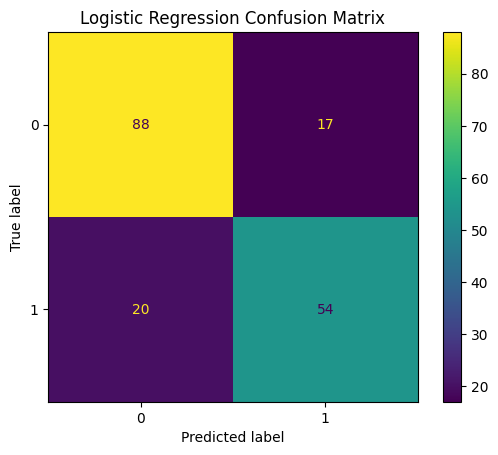

In [24]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [ ]:
y_pred = log_reg.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

MODEL 2. Support Vector Machine - needs scaling

In [10]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
svm_acc = svm.score(X_test_scaled, y_test)
print(f"SVM - Accuracy: {svm_acc:.2%}")

SVM - Accuracy: 79.89%


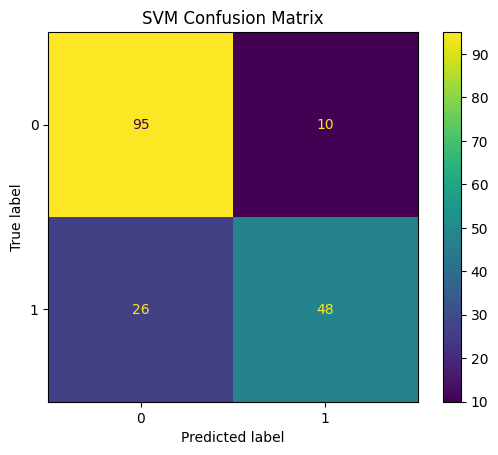

In [23]:
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test)
plt.title("SVM Confusion Matrix")
plt.show()

In [30]:
y_pred = svm.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

Accuracy:  79.89%
Precision: 82.76%
Recall:    64.86%
F1 Score:  72.73%


MODEL 3. Decision Tree (no scaling needed)

In [11]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
tree_acc = tree.score(X_test, y_test)
print(f"Decision Tree - Accuracy: {tree_acc:.2%}")

Decision Tree - Accuracy: 77.09%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


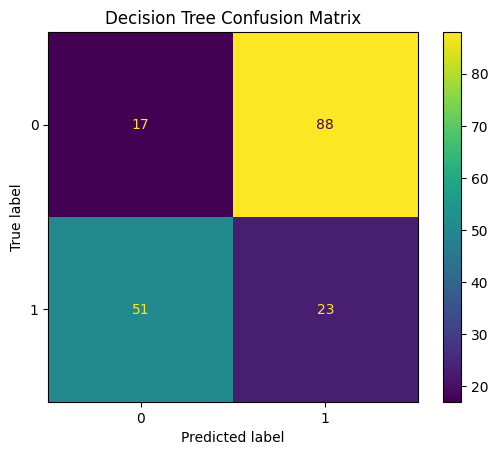

In [25]:
ConfusionMatrixDisplay.from_estimator(tree, X_test_scaled, y_test)
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [31]:
y_pred = tree.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

Accuracy:  22.35%
Precision: 20.72%
Recall:    31.08%
F1 Score:  24.86%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


MODEL 4. Random Forest

In [12]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_acc = forest.score(X_test, y_test)
print(f"Random Forest - Accuracy: {forest_acc:.2%}")

Random Forest - Accuracy: 76.54%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


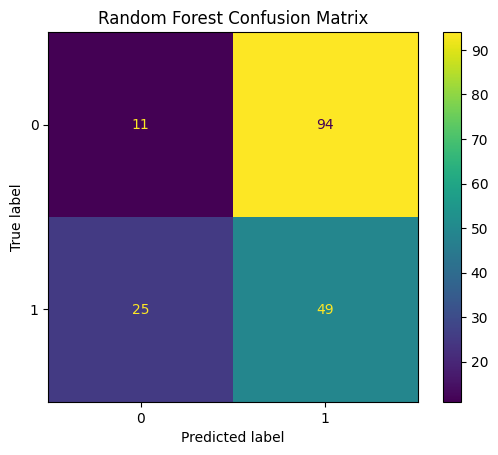

In [26]:
ConfusionMatrixDisplay.from_estimator(forest, X_test_scaled, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [32]:
y_pred = forest.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

Accuracy:  33.52%
Precision: 34.27%
Recall:    66.22%
F1 Score:  45.16%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


MODEL 5: KNN - needs scaling

In [15]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn_acc = knn.score(X_test_scaled, y_test)
print(f"KNN Accuracy: {knn_acc:.2%}")

KNN Accuracy: 80.45%


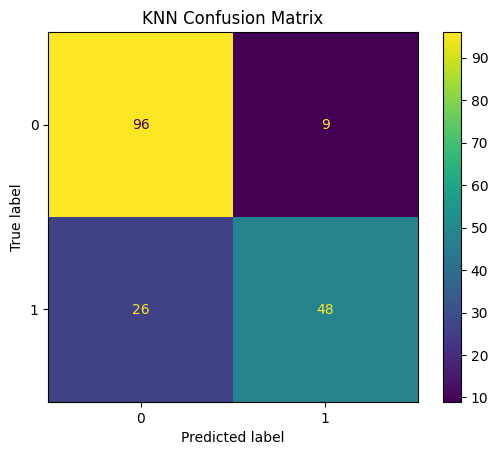

In [27]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title("KNN Confusion Matrix")
plt.show()

In [33]:
y_pred = knn.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

Accuracy:  80.45%
Precision: 84.21%
Recall:    64.86%
F1 Score:  73.28%


MODEL 6. Naive Bayes (no scaling)

In [16]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = nb.score(X_test, y_test)
print(f"Naive Bayes - Accuracy: {nb_acc:.2%}")

Naive Bayes - Accuracy: 74.86%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


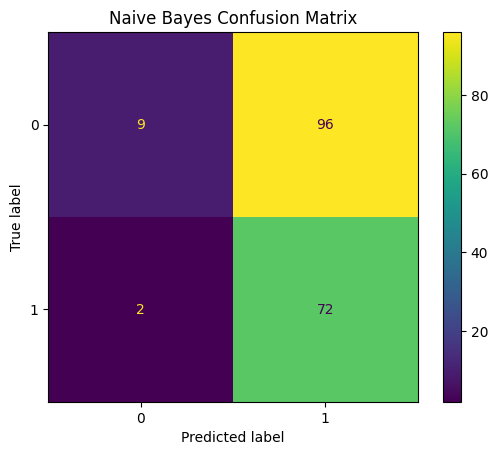

In [28]:
ConfusionMatrixDisplay.from_estimator(nb, X_test_scaled, y_test)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [34]:
y_pred = nb.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2%}")
print(f"Precision: {prec:.2%}")
print(f"Recall:    {rec:.2%}")
print(f"F1 Score:  {f1:.2%}")

Accuracy:  45.25%
Precision: 42.86%
Recall:    97.30%
F1 Score:  59.50%


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Gathering the Accuracy Results

In [35]:
model_names = ['Logistic Reg', 'KNN', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracies = [log_acc, knn_acc, svm_acc, tree_acc, forest_acc, nb_acc]
for name, acc in zip(model_names, accuracies):
    print(f"{name:20} {acc:.2%}")

Logistic Reg         79.33%
KNN                  80.45%
SVM                  79.89%
Decision Tree        77.09%
Random Forest        76.54%
Naive Bayes          74.86%


VISUALIZE ACCURACY RESULTS

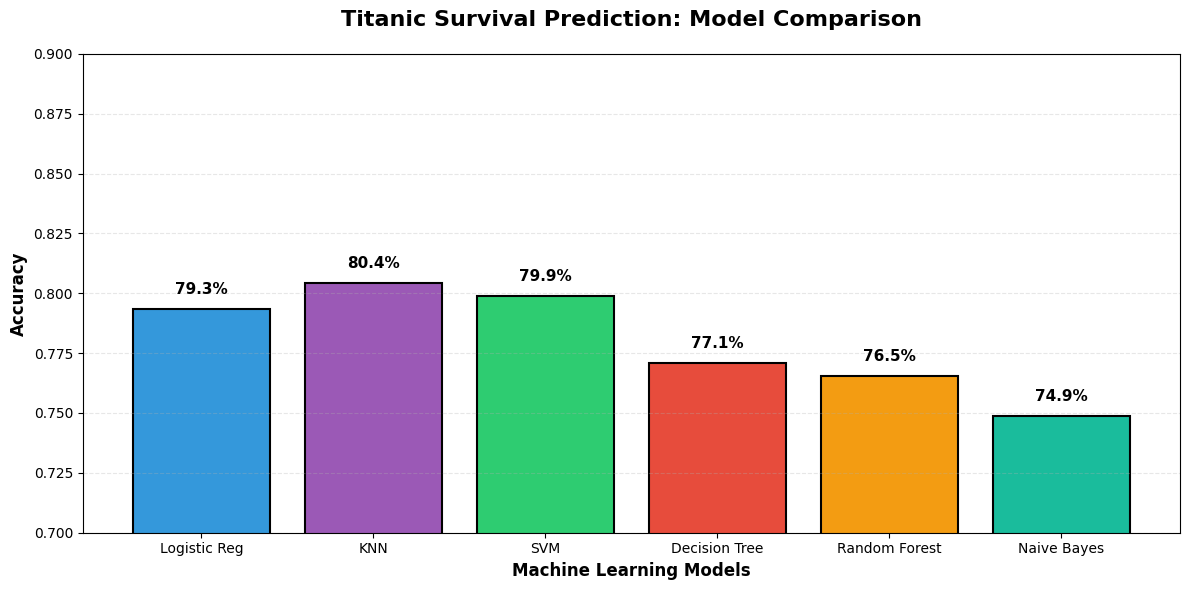

In [21]:
plt.figure(figsize=(12, 6))
colors = ['#3498db', '#9b59b6', '#2ecc71', '#e74c3c', '#f39c12', '#1abc9c']
bars = plt.bar(model_names, accuracies, color=colors, edgecolor='black', linewidth=1.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f"{height:.1%}", ha='center', va='bottom', fontweight='bold', fontsize=11)
plt.ylim(0.7, 0.9)
plt.title("Titanic Survival Prediction: Model Comparison", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Accuracy", fontsize=12, fontweight='bold')
plt.xlabel("Machine Learning Models", fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()